# POSTTEST 7
oleh [Andi Rachmad Triandika Rusli](https://github.com/andirchmd) (2109106132)

## Pembuatan Model *Convulotional Neural Network* (CNN) & *Data Augmentation*


---

Dataset: [Water Bottle Image Classification Dataset | Kaggle](https://www.kaggle.com/datasets/chethuhn/water-bottle-dataset/data)

### Download Dataset dari Kaggle

In [4]:
!kaggle datasets download -d chethuhn/water-bottle-dataset

 55% 35.0M/64.2M [00:00<00:00, 192MB/s] 
100% 64.2M/64.2M [00:00<00:00, 212MB/s]


### Unzip Dataset

In [12]:
!unzip /content/water-bottle-dataset.zip

Archive:  /content/water-bottle-dataset.zip
  inflating: Full  Water level/Full  Water level/-on-white-background-transparent-plastic-pet-bottle-of-mineral-water-2DA55DY_85_11zon.jpeg  
  inflating: Full  Water level/Full  Water level/01-waterbottlesun_20190719_0023_2x3_1_11zon.jpeg  
  inflating: Full  Water level/Full  Water level/0bnC0a9OdzJtymklrmne_1_11zon.jpeg  
  inflating: Full  Water level/Full  Water level/1-0l-fresh-water-bottle-mockup_358694-280_3_11zon.jpeg  
  inflating: Full  Water level/Full  Water level/1000_F_181641215_ZAQ5NSDRONequztAW4ipiNfPlyuEa3s0_19_11zon.jpeg  
  inflating: Full  Water level/Full  Water level/1000_F_251350383_qpgK1Q0u3nBLak8CjH7rENWlY7NRbLwI_21_11zon.jpeg  
  inflating: Full  Water level/Full  Water level/1000_F_294537209_JaQefXgA0A6O37NfDHTib6zROQcHT9Jd_22_11zon.jpeg  
  inflating: Full  Water level/Full  Water level/108-1086053_transparent-background-water-bottle-png-png-download.png  
  inflating: Full  Water level/Full  Water level/11178-Dif

### Import Library

In [13]:
import os
import cv2
import numpy as np

### Inisiasi Variabel list

In [14]:
data = []
labels = []
input_size = 64
image_size = (input_size, input_size)

### Ekstrak gambar ke list

In [15]:
# Path Direktori
directory = "/content/Water Bottle Dataset"

# Ekstrak semua gambar ke list
for sub_folder in os.listdir(directory):
    sub_folder_path = os.path.join(directory, sub_folder)
    for sub_sub_folder in os.listdir(sub_folder_path):
        sub_sub_folder_path = os.path.join(sub_folder_path, sub_sub_folder)
        for image_file in os.listdir(sub_sub_folder_path):
            if image_file.endswith(".jpeg") or image_file.endswith(".png"):
                image_path = os.path.join(sub_sub_folder_path, image_file)
                # Baca Gambar pakai Cv2
                image = cv2.imread(image_path)
                # Resize Gambar
                image = cv2.resize(image, image_size)
                # Tambah Gambar ke data list
                data.append(image)
                # Tambah Label
                labels.append(sub_folder)


# Konversi gambar dan label jadi array
data = np.array(data)
labels = np.array(labels)

# Print dimensi dataset
print(f'data shape:{data.shape}')
print(f'labels shape:{labels.shape}')

data shape:(486, 64, 64, 3)
labels shape:(486,)


### Plot Jumlah Data Gambar + Label

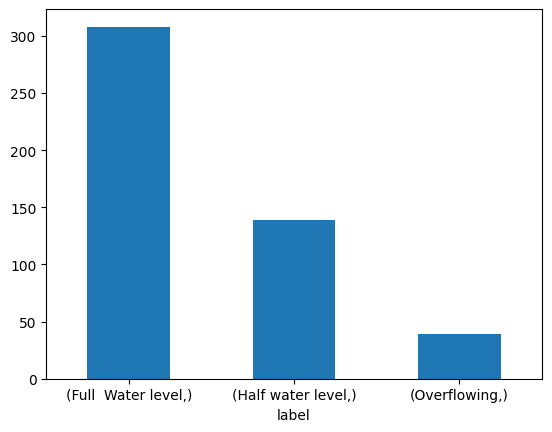

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({"label":labels})
df.value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
plt.show()

### Augmentasi Data

In [17]:
from keras.preprocessing.image import ImageDataGenerator

X = data
y = labels
n_gen = 40

# ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=0, #0
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(X)
X_augmented, y_augmented = [], []

for X_batch, y_batch in datagen.flow(X, y, batch_size=32):
    X_augmented.append(X_batch)
    y_augmented.append(y_batch)
    if len(X_augmented) >= 100:
        break

data = np.concatenate((X, np.concatenate(X_augmented)))
labels = np.concatenate((y, np.concatenate(y_augmented)))

print(f"data augmented shape : {data.shape}")
print(f"labels augmented shape : {labels.shape}")

import pandas as pd
df = pd.DataFrame({"label":labels})
df.value_counts()

data augmented shape : (3530, 64, 64, 3)
labels augmented shape : (3530,)


label            
Full  Water level    2235
Half water level     1011
Overflowing           284
dtype: int64

### Split Data Train Test

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

data = X_train # Split training data
labels = y_train # Split training labels

X_test = X_test # Test data
y_test = y_test # Test labels

### Normalisasi Gambar

In [20]:
# Normalisasi value pixel
data = data / 255.0
X_test = X_test / 225.0

### Konversi Label

In [21]:
labels = labels
# Konversi label menggunakan one hot encoding
labels_one_hot = np.zeros((labels.shape[0], 3))

for i, label in enumerate(labels):
    if label == "Full  Water level":
        labels_one_hot[i, 0] = 1
    elif label == "Half water level":
        labels_one_hot[i, 1] = 1
    else:
        labels_one_hot[i, 2] = 1

### Model CNN

In [34]:
def run_custom_model(batch_size, epochs):

    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.optimizers import Adam, SGD

    tf.random.set_seed(42)

    # Buat Model CNN Sequential
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(input_size,input_size,3)),
        keras.layers.Conv2D(32, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(256, (3,3), activation='relu'),
        keras.layers.Conv2D(256, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.2),

        keras.layers.Flatten(),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(3, activation='softmax')
    ])


    # Compile
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    import time
    start_time = time.time()

    early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

    history = model.fit(x=data,
                        y=labels_one_hot,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_split=0.2,)

    print("Test accuracy: ", max(history.history['val_accuracy']))

    self_train_model = history

    end_time = time.time()
    training_time = end_time - start_time
    print("Training time:", training_time, "seconds")

    self_train_model_time = training_time

    return self_train_model, self_train_model_time

### Pre-Trained Model ResNet50

In [35]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

import time
start_time = time.time()

X=data
y=labels_one_hot

tf.random.set_seed(42)

# Pre Trained Model dari resnet50
resnet = ResNet50(include_top=False, input_shape=(input_size, input_size, 3))

for layer in resnet.layers:
    layer.trainable = False

x = Flatten()(resnet.output)
x = Dense(128, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

# Buat Model Baru
model = Model(inputs=resnet.input, outputs=x)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X, y, epochs=100, batch_size=256, validation_split=0.2)

# Evaluasi
print("Test accuracy: ", max(history.history['val_accuracy']))

pre_train_model = history

end_time = time.time()
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

pre_train_model_time = training_time

Epoch 1/100
9/9 [==============================] - 5s 258ms/step - loss: 1.0182 - accuracy: 0.5750 - val_loss: 1.0346 - val_accuracy: 0.6106
Epoch 2/100
9/9 [==============================] - 1s 116ms/step - loss: 0.8632 - accuracy: 0.6405 - val_loss: 0.8572 - val_accuracy: 0.6106
Epoch 3/100
9/9 [==============================] - 1s 95ms/step - loss: 0.7970 - accuracy: 0.6463 - val_loss: 0.8506 - val_accuracy: 0.6106
Epoch 4/100
9/9 [==============================] - 1s 111ms/step - loss: 0.7797 - accuracy: 0.6534 - val_loss: 0.8263 - val_accuracy: 0.6088
Epoch 5/100
9/9 [==============================] - 1s 111ms/step - loss: 0.7650 - accuracy: 0.6459 - val_loss: 0.8137 - val_accuracy: 0.6265
Epoch 6/100
9/9 [==============================] - 1s 111ms/step - loss: 0.7587 - accuracy: 0.6578 - val_loss: 0.8318 - val_accuracy: 0.6106
Epoch 7/100
9/9 [==============================] - 1s 94ms/step - loss: 0.7554 - accuracy: 0.6556 - val_loss: 0.8169 - val_accuracy: 0.6106
Epoch 8/100
9/9

### Train Model CNN biasa

In [38]:
self_train_model, self_train_model_time = run_custom_model(batch_size = 256,epochs = 100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                        

### Fungsi untuk Plotting

In [36]:
def plot_model_loss_and_acc(model, name):
    import matplotlib.pyplot as plt

    history = model

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.ylim(0,1.1)


    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.ylim(0,1.1)

    plt.suptitle(name)
    plt.show()

### Plot Model

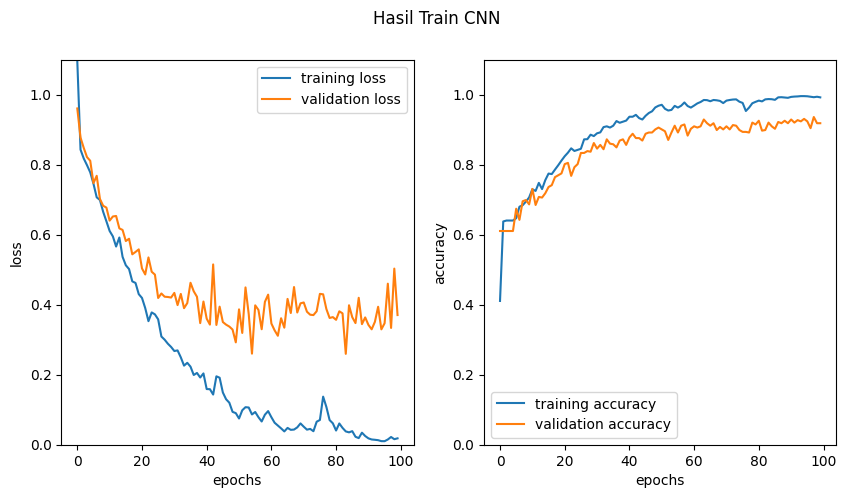

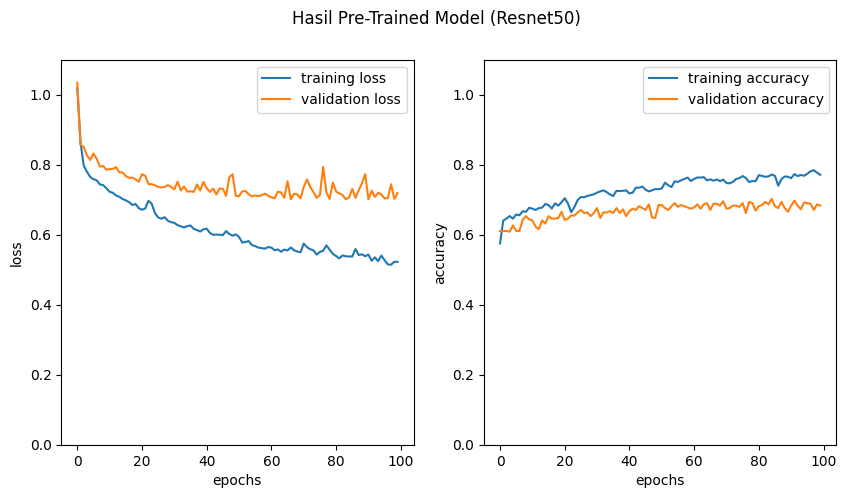

In [41]:
plot_model_loss_and_acc(self_train_model, 'Hasil Train CNN')
plot_model_loss_and_acc(pre_train_model, 'Hasil Pre-Trained Model (Resnet50)')